In [85]:
%matplotlib inline
from memory_profiler import memory_usage
import os
import pandas as pd
from glob import glob
import numpy as np

In [6]:
%%capture
!apt-get install libav-tools -y

In [7]:
from keras import layers
from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
from path import Path

In [22]:
def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('C:/Users/varan/Documents/Sounddata/working/Train/'+name+'.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [23]:
def create_spectrogram_test(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('C:/Users/varan/Documents/Sounddata/working/Test/'+name+'.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [6]:
Data_dir=np.array(glob("C:/Users/varan/Documents/Sounddata/Train/*"))

In [7]:
np.shape(Data_dir)

(5435,)

In [8]:
%load_ext memory_profiler


In [9]:
%%memit 
i=0
for file in Data_dir[i:i+2000]:
    #Define the filename as is, "name" refers to the JPG, and is split off into the number itself. 
    filename,name = file,file.split('/')[-1].split('\\')[-1].split('.')[0]
    create_spectrogram(filename,name)

peak memory: 413.76 MiB, increment: 141.13 MiB


In [10]:
gc.collect()

23895

In [12]:
%%memit 
i=2000
for file in Data_dir[i:i+2000]:
    filename,name = file,file.split('/')[-1].split('\\')[-1].split('.')[0]
    create_spectrogram(filename,name)

peak memory: 425.38 MiB, increment: 131.19 MiB


In [13]:
gc.collect()


46296

In [19]:
%%memit 
i=4000
for file in Data_dir[i:]:
    filename,name = file,file.split('/')[-1].split('\\')[-1].split('.')[0]
    create_spectrogram(filename,name)

peak memory: 383.81 MiB, increment: 123.34 MiB


In [20]:
gc.collect()

1318

In [22]:
Test_dir=np.array(glob("C:/Users/varan/Documents/Sounddata/Test/*"))

In [23]:
np.shape(Test_dir)

(3297,)

In [24]:
%%memit 
i=0
for file in Test_dir[i:i+1500]:
    filename,name = file,file.split('/')[-1].split('\\')[-1].split('.')[0]
    create_spectrogram_test(filename,name)

C:\Users\varan\Anaconda3\lib\site-packages\librosa\filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


peak memory: 383.91 MiB, increment: 131.77 MiB


In [25]:
gc.collect()

35049

In [26]:
%%memit 
i=1500
for file in Test_dir[i:]:
    filename,name = file,file.split('/')[-1].split('\\')[-1].split('.')[0]
    create_spectrogram_test(filename,name)

peak memory: 394.55 MiB, increment: 147.16 MiB


In [27]:
gc.collect()

49106

In [8]:
from keras_preprocessing.image import ImageDataGenerator
def append_ext(fn):
    return fn+".jpg"

In [9]:
traindf=pd.read_csv('C:/Users/varan/Documents/Sounddata/train.csv',dtype=str)
testdf=pd.read_csv('C:/Users/varan/Documents/Sounddata/test.csv',dtype=str)
traindf["ID"]=traindf["ID"].apply(append_ext)
testdf["ID"]=testdf["ID"].apply(append_ext)

In [10]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)


In [11]:
train_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="C:/Users/varan/Documents/Sounddata/working/Train/",
    x_col="ID",
    y_col="Class",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

Found 4077 images belonging to 10 classes.


In [12]:
valid_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="C:/Users/varan/Documents/Sounddata/working/Train/",
    x_col="ID",
    y_col="Class",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

Found 1358 images belonging to 10 classes.


In [13]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizers.rmsprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)  

In [15]:
#Fitting keras model, no test gen for now
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
A=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=150
)
B=model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
127/127 [==============================] - 27s 209ms/step - loss: 2.0767 - acc: 0.2215 - val_loss: 1.9476 - val_acc: 0.3073
Epoch 2/150
127/127 [==============================] - 15s 115ms/step - loss: 1.7984 - acc: 0.3574 - val_loss: 1.5429 - val_acc: 0.4932
Epoch 3/150
127/127 [==============================] - 14s 109ms/step - loss: 1.3899 - acc: 0.5148 - val_loss: 1.1272 - val_acc: 0.6056
Epoch 4/150
127/127 [==============================] - 14s 111ms/step - loss: 1.1267 - acc: 0.6025 - val_loss: 0.9892 - val_acc: 0.6554
Epoch 5/150
127/127 [==============================] - 14s 111ms/step - loss: 0.9394 - acc: 0.6853 - val_loss: 0.7951 - val_acc: 0.7443
Epoch 6/150
127/127 [==============================] - 17s 130ms/step - loss: 0.8178 - acc: 0.7293 - val_loss: 0.6886 - val_acc: 0.7783
Epoch 7/150
127/127 [==============================] - 17s 130ms/step - loss: 0.7051 - acc: 0.7719 - val_loss: 0.6270 - val_acc: 0.7979


Epoch 59/150
127/127 [==============================] - 14s 107ms/step - loss: 0.0692 - acc: 0.9798 - val_loss: 0.3957 - val_acc: 0.9246
Epoch 60/150
127/127 [==============================] - 14s 111ms/step - loss: 0.0831 - acc: 0.9774 - val_loss: 0.4544 - val_acc: 0.9231
Epoch 61/150
127/127 [==============================] - 14s 107ms/step - loss: 0.0786 - acc: 0.9780 - val_loss: 0.4102 - val_acc: 0.9306
Epoch 62/150
127/127 [==============================] - 14s 111ms/step - loss: 0.0606 - acc: 0.9793 - val_loss: 0.4526 - val_acc: 0.9276
Epoch 63/150
127/127 [==============================] - 14s 108ms/step - loss: 0.0773 - acc: 0.9766 - val_loss: 0.3257 - val_acc: 0.9306
Epoch 64/150
127/127 [==============================] - 14s 110ms/step - loss: 0.0629 - acc: 0.9801 - val_loss: 0.4897 - val_acc: 0.9140
Epoch 65/150
127/127 [==============================] - 14s 109ms/step - loss: 0.0616 - acc: 0.9827 - val_loss: 0.3432 - val_acc: 0.9412
Epoch 66/150
127/127 [===================

127/127 [==============================] - 14s 107ms/step - loss: 0.0958 - acc: 0.9796 - val_loss: 0.6107 - val_acc: 0.9359
Epoch 119/150
127/127 [==============================] - 13s 105ms/step - loss: 0.1099 - acc: 0.9811 - val_loss: 0.4677 - val_acc: 0.9397
Epoch 120/150
127/127 [==============================] - 14s 106ms/step - loss: 0.0849 - acc: 0.9839 - val_loss: 0.6069 - val_acc: 0.9216
Epoch 121/150
127/127 [==============================] - 14s 107ms/step - loss: 0.1353 - acc: 0.9773 - val_loss: 0.7038 - val_acc: 0.9238
Epoch 122/150
127/127 [==============================] - 14s 107ms/step - loss: 0.1364 - acc: 0.9774 - val_loss: 0.4590 - val_acc: 0.9449
Epoch 123/150
127/127 [==============================] - 14s 107ms/step - loss: 0.0885 - acc: 0.9833 - val_loss: 0.6545 - val_acc: 0.9306
Epoch 124/150
127/127 [==============================] - 14s 108ms/step - loss: 0.1175 - acc: 0.9806 - val_loss: 0.6102 - val_acc: 0.9321
Epoch 125/150
127/127 [=========================

In [16]:
print(A.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


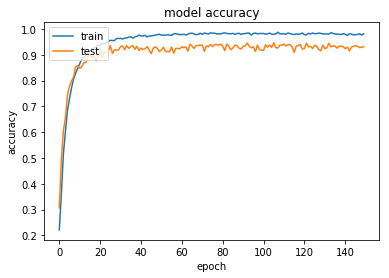

In [17]:
import matplotlib.pyplot as plt
plt.plot(A.history['acc'])
plt.plot(A.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    directory="C:/Users/varan/Documents/Sounddata/working/Test/",
    x_col="ID",
    y_col=None,
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(64,64))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 3297 images.


In [88]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)
print(np.shape(pred))
predicted_class_indices=np.argmax(pred,axis=1)

#Fetch labels from train gen for testing
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions[0:1])

103/103 [==============================] - 12s 116ms/step
(3296, 10)
['jackhammer']
